### Class 1
This week's classroom instruction will focus on three things:
- **Part 1**: Getting the integration between UCloud and GitHub to work
- **Part 2**: Learning how to setup a virtual environment for Python
- **Part 3**: A few warm-up exercises on string manipulation

#### Part 1: Integration between UCloud and GitHub
First, follow the instructions provided in `ucloud.md`.

Once you have done that, let's look at how to use the repository with course materials. First, log in to https://github.com and go to the repository's link: https://github.com/rbroc/NLP-AU-23. 

##### Forking the repository
Click on `Fork` (top-right of the page). This creates a copy of the repository which is partly independent of the original repository. You will be submitting changes to *this* repository. 
The original repository will be iteratively updated with new materials or exercises. You can sync the two by setting them both as *remotes* in your local instance of the repository. 

##### Cloning the repository and setting up remotes
With the VS Code app on UCloud open, and a Terminal open, you can clone your repository by `cd`-ing into your private drive (the one called `MemberFiles[yourname][idnr]`), and running: 
```
git clone https://github.com/your_username/NLP-AU-23
```

You can visualize your remotes by typing: `git remote -v`.
You should add my repository as a remote, by running:
```
git remote add [robertas_remote_name] https://github.com/rbroc/NLP-AU-23.git
```

##### Our workflow
As my repository gets updated, you can pull it into yours by running:
```
git pull [robertas_remote_name]
```

You can push to your remote by typing:
```
git push origin [branch_name]
```

Once you have done this, our workflow will be the following:
- You run the github setup script (and log in with your token if needed)
- You go to your local repo
- You pull my repo
- You make changes and push to your fork

#### Part 2: Virtual environments
A good way to manage dependencies for specific projects and avoid conflicts is to create virtual environments (which contain bundles of libraries that you can "activate" and "deactivate" at will, without those interfering with your global environment). I tend to keep my virtual environments in the same place, e.g., a subfolder called `venvs` in my private drive on UCloud.

##### Creating, activating, and deactivating a virtual environment

Run these two lines (or add them to your setup script):
```
sudo apt-get update
sudo apt-get install python3-venv
```


Let's create a virtual enviroment.
1. Navigate to your private drive if you are not there already, or to wherever location you want to keep your enviroments in (`path_to_folder`)
2. Create a virtual environment folder, e.g., by running `mkdir venvs`
3. Create a new virtual environment (`nlp-e23`), by running:
`python -m venv path_to_folder/venvs/nlp-e23`
4. You can activate it by running: `source path_to_folder/nlp-e23/bin/activate`
5. To deactivate it, you can simply run: `deactivate`
Anything you `pip install` while the enviroment is active stays inside the environment. 
To make sure you have the latest pip, run:
```
pip install --upgrade pip
```
The nice thing about this is that you don't need to reinstall stuff whenever you open UCloud, just load your virtual environment.

##### Using it in a notebook
Everything you install which the virtual environment is active is fully contained inside the virtual environments.
If you virtual environment is active, scripts will use it, but an extra step is needed to use it as part of notebooks.
First, we need to install ipykernel:
```
pip install ipykernel
```

Then, we need to create a new kernel using our virtual environment:
```
python3 -m ipykernel install --user --name=nlp-e23
```

Now try to open a notebook (you can create an empty one by running `touch notebook_name.ipynb`). On the top right, you can choose a kernel. A kernel based on the virtual environment will be available.

##### Installing libraries from a requirements file
An easy way to keep track of your dependencies is to add them to a requirements file. They are generally called something like `requirements.txt`, and they are simply a list of libraries your project needs.
The content of the text file looks something like this:
```
datasets==2.12.0
pandas==1.5.3
```
You will have one library per line, and -- although it is not obligatory -- you can pin the package to the version you know is needed for your project.
You can install all the dependencies needed from your requirements file, by running:

`pip install -r requirements.txt`


#### Part 3: Warm-up exercises
What follows is a few exercises to get back in shape with Python syntax, especially for what concerns simple string manipulation.

In [1]:
pip install ipykernel
# Run this in terminal by just opening new terminal from the interface menu
# python3 -m ipykernel install --user --name=nlp-e23

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### String concatenation
Write a function that takes two strings as input, and returns a concatenated string, where the second string is appended to the end of first one.

*NOTE*: here I am specifying the type of inputs and outputs. With this, your function will fail if you pass inputs that don't match (generally, a good sanity check for functions)

In [ ]:
def str_con(x,y):
    return x+y

In [1]:
def concat_two_strings(str1: str, str2: str) -> str:
    return str1+str2

In [2]:
concat_two_strings(str1='ab', str2='cd')

'abcd'

Now write a function that can take any number of strings, and concatenate all of them. Hint: you can use a different data structure to pass the strings (e.g., an iterable), or use an asterisk to pass any number of arguments to the function call.

In [3]:
def concat_any_string(*args: str):
    out = ''.join(args)
    return out

In [4]:
concat_any_string('ab', 'cd', 'df', 'ef')

'abcddfef'

#### Counting substrings
Write a function that takes two inputs: 
- l, which is a single character;
- s, which is a string. 

The function should return how many times l is contained in s (an integer). Your function should not be case-sensitive (if l='r', occurrences of 'R' should also be counted).
First, a basic but a bit more verbose solution.

In [5]:
def letter_count(l: str, s: str) -> int:
    lower_s = s.lower()
    counter = 0
    for sub in lower_s:
        if sub==l:
            counter += 1
    return counter

Let's make a test case

In [9]:
import random
str_as_lst = ['s']*7 + ['r']*3 # we know we expect 7x 's'
random.shuffle(str_as_lst)
test_case = str(str_as_lst)

Now let's test the function

In [10]:
letter_count(l='s', s=test_case)

7

In [11]:
from collections import Counter
def letter_count_alt(l: str, s: str) -> int:
    lower_w = s.lower()
    all_counts = Counter(lower_w) # returns a dictionary-like structure
    return all_counts[l]

In [12]:
letter_count_alt(l='s', s=test_case)

7

Can you make a function that generalizes to l being any sequence of characters (e.g., counting how many times the substring `ab` occurs)? 
Hint: you can do it in base python, or use functions (e.g., `findall`) from the regex package `re`.

In [1]:
# Looking at the functions used below
import re
matches = re.findall("ab", "abcdefgabhjhkkabjhe")
print(matches)
# so all the matches are saved in a list, and the length of that is the number of matches

['ab', 'ab', 'ab']


In [13]:
import re 

def nchar_count(l: str, s: str) -> int:
    matches = re.findall(l, s.lower())
    return len(matches)

In [15]:
# like before, let's make a test case
str_as_lst = ['aba']*5 + ['others']*3 # we know we expect 7x 's'
random.shuffle(str_as_lst)
test_case = str(str_as_lst)

In [16]:
nchar_count('aba', test_case)

5

Now edit the previous function to be able to return counts for multiple strings (make *l* an iterable, e.g., a list).
The output should be a dictionary with keys *k* and values *v*, such that k are all elements of *l*, and *v* is the respective count.

In [17]:
from typing import Union

def generalized_counter(l: Union[list[str], set[str]], s: str):
    lower_s = s.lower()
    count_dict = {}
    for item in l:
        val = len(re.findall(item,lower_s))
        count_dict[item] = val
    return count_dict

In [18]:
generalized_counter(['a', 'ab', 'd'], 'abdpndabtadkkd')

{'a': 3, 'ab': 2, 'd': 4}

#### Loading text files

Loading a text file: the `data` folder contains a file called `book-war-and-peace.txt`.
Use the functions `open` and `read` to read the file as a single string, and split it into a list of words, based on the presence of whitespaces.
Once you have done this, try to use the function `readlines` instead: what does it do?

In [4]:
text = open('../data/book-war-and-peace.txt').read()
text_list = text.split(sep=" ")
print(text_list[:20])

['CHAPTER', 'I\n\n"Well,', 'Prince,', 'so', 'Genoa', 'and', 'Lucca', 'are', 'now', 'just', 'family', 'estates', 'of', 'the\nBuonapartes.', 'But', 'I', 'warn', 'you,', 'if', 'you']


In [3]:
text[:100]

'CHAPTER I\n\n"Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I w'

In [21]:
open('../data/book-war-and-peace.txt').readlines() 

['CHAPTER I\n',
 '\n',
 '"Well, Prince, so Genoa and Lucca are now just family estates of the\n',
 "Buonapartes. But I warn you, if you don't tell me that this means war,\n",
 'if you still try to defend the infamies and horrors perpetrated by that\n',
 'Antichrist--I really believe he is Antichrist--I will have nothing more\n',
 "to do with you and you are no longer my friend, no longer my 'faithful\n",
 "slave,' as you call yourself! But how do you do? I see I have frightened\n",
 'you--sit down and tell me all the news."\n',
 '\n',
 'It was in July, 1805, and the speaker was the well-known Anna Pavlovna\n',
 'Scherer, maid of honor and favorite of the Empress Marya Fedorovna. With\n',
 'these words she greeted Prince Vasili Kuragin, a man of high rank and\n',
 'importance, who was the first to arrive at her reception. Anna Pavlovna\n',
 'had had a cough for some days. She was, as she said, suffering from la\n',
 'grippe; grippe being then a new word in St. Petersburg, used only by t

#### Regular expressions

After reading the file with `read`, replace all newlines (`\n`) with whitespaces first, remove any sequences of multiple whitespaces, and then all alphanumeric characters (excluding spaces). Hint: you can use functions like `re.sub` to do so (here is a guide to regex patterns: https://docs.python.org/3/howto/regex.html)

In [6]:
text_no_newlines = re.sub('\n', ' ', text)
text_no_newlines = re.sub(' +', ' ', text_no_newlines)

In [7]:
text_no_newlines[:299]

'CHAPTER I "Well, Prince, so Genoa and Lucca are now just family estates of the Buonapartes. But I warn you, if you don\'t tell me that this means war, if you still try to defend the infamies and horrors perpetrated by that Antichrist--I really believe he is Antichrist--I will have nothing more to do'

In [8]:
text_no_alphanumeric = re.sub(r'[^A-Za-z0-9 ]+', '', text_no_newlines)

In [9]:
text_no_alphanumeric[:200]

'CHAPTER I Well Prince so Genoa and Lucca are now just family estates of the Buonapartes But I warn you if you dont tell me that this means war if you still try to defend the infamies and horrors perpe'

Now lowercase this text, split by whitespace, and count the number of occurrences for each word. 
Hint: 
- import `Counter` (`from collections import Counter`) to extract counts;
- transform the output of Counter into a dictionary (pass its output to `dict`)
- import pandas as pass that to `pd.DataFrame.from_dict` (set `orient=index`)
- Sort it using `sort_values`.
Visualize the top 10 and the top 100 words: what do you notice?

In [12]:
new_text = text_no_alphanumeric.lower()
counts = dict(Counter(new_text.split()))

In [13]:
import pandas as pd
data = pd.DataFrame.from_dict(data=counts, 
                              orient='index').sort_values(by=0, 
                                                          ascending=False).reset_index()

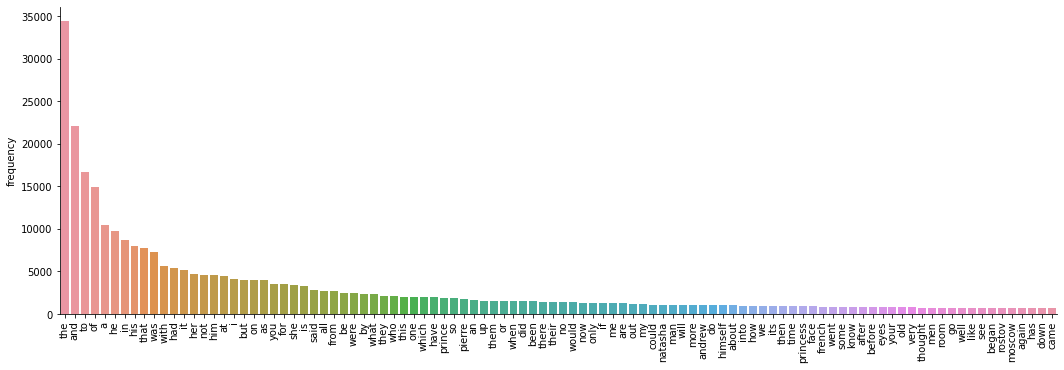

In [14]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.catplot(data=data.head(n=100), x='index', y=0, kind='bar', height=5, aspect=3)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('frequency')
plt.show()

#### 